Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4341 images of flowers.<br>
The data collection is based on the data flickr, google images, yandex images.<br>
You can use this dataset to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [8]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# load dependencies
import cv2
import os
import glob
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf

## data exploration

In [10]:
# accessing the data folder and subfolders
data_path = Path('/content/drive/MyDrive/Colab Notebooks/Dataset/flowers')
dirs = data_path.glob('*')

In [11]:
# list of features and labels
data = []
img_size = 256

def make_data():
  for folder_dir in dirs:
      label= str(folder_dir).split('/')[-1]
      print(label)

      for image_path in folder_dir.glob('*.jpg'):
        img = image.load_img(image_path, target_size=(img_size,img_size))
        img_array = image.img_to_array(img)
        gray_img = tf.image.rgb_to_grayscale(img_array)
        data.append([gray_img, label])

make_data()

sunflower
tulip
dandelion
rose
daisy


In [12]:
len(data)

4341

In [13]:
# function to separate features and labels from the data
def load_data():
  np.random.shuffle(data)

  features = []
  labels = []
  for img, label in data:
    features.append(img)
    labels.append(label)

  # converting lists into numpy arrays
  features = np.array(features, dtype=np.float32)
  labels = np.array(labels)

  return [features, labels]

In [14]:
# unpacking features, labels from load_data
(features, labels) = load_data()

In [15]:
print(len(features), len(labels))

4341 4341


In [16]:
features.shape

(4341, 256, 256, 1)

In [17]:
labels.shape

(4341,)

## data visualization

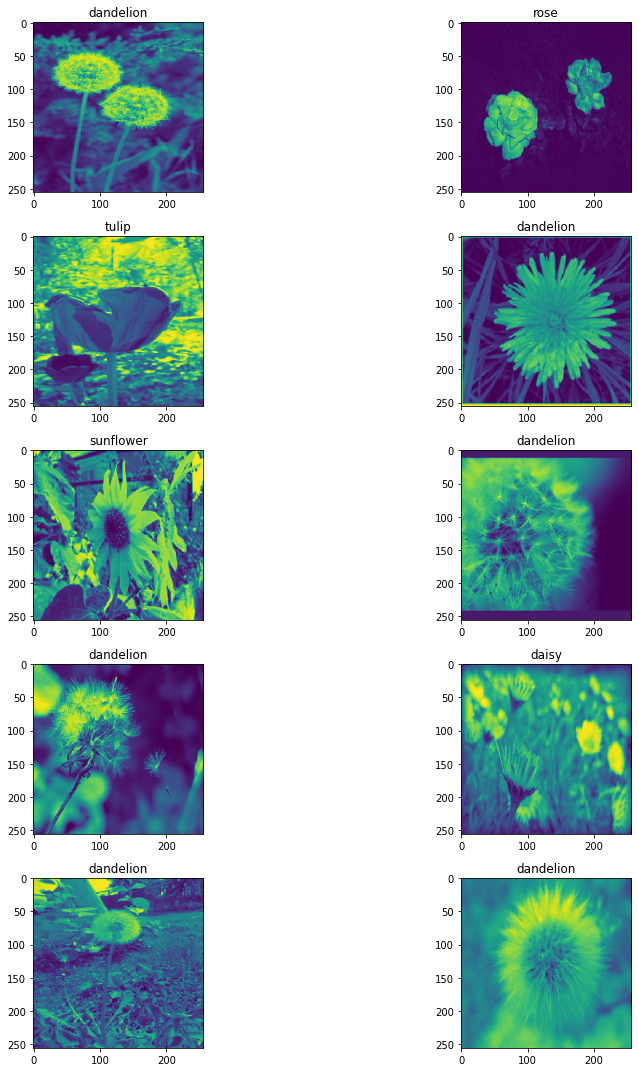

In [18]:
# drawing some random flower images
def draw_flower():
  fig,ax=plt.subplots(5,2)
  fig.set_size_inches(15,15)

  for i in range(5):
    for j in range(2):
      l = random.randint(0, len(labels))
      seq_img = features.squeeze()
      ax[i,j].imshow(seq_img[l])
      ax[i,j].set_title(labels[l])
  plt.tight_layout()

draw_flower()

## data preprocessing

In [19]:
# splitting data into 60% training set and 40% test set
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(
                                                            features,
                                                            labels,
                                                            test_size = 0.40,
                                                            random_state=42)

In [20]:
print(train_data.shape, test_data.shape)

(2604, 256, 256, 1) (1737, 256, 256, 1)


In [21]:
print(train_labels.shape, test_labels.shape)

(2604,) (1737,)


In [22]:
# reshaping and scaling train/test data
image_size = train_data.shape[1]

# reshape
train_data = train_data.reshape((-1,image_size*image_size))
test_data = test_data.reshape((-1,image_size*image_size))

# scale down
train_data = train_data/255.0
test_data = test_data/255.0

In [23]:
print(train_data.shape, test_data.shape)

(2604, 65536) (1737, 65536)


In [24]:
# encoding labels
from sklearn.preprocessing import LabelEncoder

# creating encoder
encoder = LabelEncoder()
# fit and transform labels
train_labels = encoder.fit_transform(train_labels)
test_labels = encoder.fit_transform(test_labels)

In [25]:
print(train_labels.shape, test_labels.shape)

(2604,) (1737,)


## building model and training

#### baseline model

In [26]:
# baseline model definition
def baseline_model():
  model = Sequential([
      Dense(32, activation='relu', input_shape=(train_data.shape[-1],)),
      Dense(16, activation='relu'),
      Dense(5, activation='softmax')
  ])


  # compile the model
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

In [27]:
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                2097184   
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 85        
Total params: 2,097,797
Trainable params: 2,097,797
Non-trainable params: 0
_________________________________________________________________


In [28]:
# train model
model.fit(train_data, train_labels, epochs=60, batch_size=128)

Epoch 1/60
21/21 [==============================] - 2s 87ms/step - loss: 4.5126 - accuracy: 0.2080
Epoch 2/60
21/21 [==============================] - 2s 87ms/step - loss: 1.8296 - accuracy: 0.2312
Epoch 3/60
21/21 [==============================] - 2s 91ms/step - loss: 1.6514 - accuracy: 0.2591
Epoch 4/60
21/21 [==============================] - 2s 87ms/step - loss: 1.5343 - accuracy: 0.2789
Epoch 5/60
21/21 [==============================] - 2s 87ms/step - loss: 1.5009 - accuracy: 0.3218
Epoch 6/60
21/21 [==============================] - 2s 87ms/step - loss: 1.5966 - accuracy: 0.2660
Epoch 7/60
21/21 [==============================] - 2s 87ms/step - loss: 1.5632 - accuracy: 0.2931
Epoch 8/60
21/21 [==============================] - 2s 88ms/step - loss: 1.4792 - accuracy: 0.3323
Epoch 9/60
21/21 [==============================] - 2s 90ms/step - loss: 1.4927 - accuracy: 0.3220
Epoch 10/60
21/21 [==============================] - 2s 86ms/step - loss: 1.5472 - accuracy: 0.3234
Epoch 11/

#### second model

In [47]:
# another model definition
from keras.regularizers import l2
from keras.layers import Dropout

def second_model():
  model = Sequential([
      Dense(64, activation='relu', kernel_regularizer=l2(0.001),
            input_shape=(train_data.shape[-1],)),
      Dropout(0.2),
      Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
      Dropout(0.2),
      Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
      Dense(5, activation='softmax')
  ])


  # compile the model
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [48]:
model = second_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                4194368   
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 85        
Total params: 4,197,061
Trainable params: 4,197,061
Non-trainable params: 0
____________________________________________

In [49]:
# train model
model.fit(train_data, train_labels, epochs=30, batch_size=128)

Epoch 1/30
21/21 [==============================] - 3s 115ms/step - loss: 3.2283 - accuracy: 0.2208
Epoch 2/30
21/21 [==============================] - 2s 111ms/step - loss: 1.8458 - accuracy: 0.1880
Epoch 3/30
21/21 [==============================] - 2s 114ms/step - loss: 1.8149 - accuracy: 0.2203
Epoch 4/30
21/21 [==============================] - 2s 114ms/step - loss: 1.7926 - accuracy: 0.2482
Epoch 5/30
21/21 [==============================] - 2s 118ms/step - loss: 1.7685 - accuracy: 0.2505
Epoch 6/30
21/21 [==============================] - 2s 113ms/step - loss: 1.7513 - accuracy: 0.2419
Epoch 7/30
21/21 [==============================] - 3s 119ms/step - loss: 1.7348 - accuracy: 0.2487
Epoch 8/30
21/21 [==============================] - 2s 114ms/step - loss: 1.7548 - accuracy: 0.2380
Epoch 9/30
21/21 [==============================] - 2s 114ms/step - loss: 1.7208 - accuracy: 0.2458
Epoch 10/30
21/21 [==============================] - 2s 112ms/step - loss: 1.7097 - accuracy: 0.2338

## model evaluation

In [52]:
# evaluation on test set
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 23.43120276927948


In [53]:
# make predictions
pred = model.predict(test_data)
pred[0]

array([0.1747248 , 0.24863721, 0.18026055, 0.17051381, 0.2258636 ],
      dtype=float32)